In [36]:
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv(r"C:\Users\Asus\Downloads\insurance.csv")
insured=df.copy()

In [38]:
insured.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [39]:
insured.shape

(1338, 7)

In [40]:
region=set(insured['region'])

In [41]:
insured['sex']=insured['sex'].astype("category")
insured['region']=insured['region'].astype("category")
insured['children']=insured['children'].astype("category")
insured['smoker']=insured['smoker'].astype("category")

In [42]:
insured.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   category
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   expenses  1338 non-null   float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 37.4 KB


In [43]:
insured.select_dtypes(['category'])

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest
...,...,...,...,...
1333,male,3,no,northwest
1334,female,0,no,northeast
1335,female,0,no,southeast
1336,female,0,no,southwest


In [44]:
insured['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [45]:
insured['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [46]:
insured['region'].value_counts()

region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64

In [47]:
len(insured[insured['smoker'] == 'yes'])

274

In [48]:
len(insured[insured['sex'] == 'female'])

662

In [49]:
len(insured[insured['sex'] == 'male'])

676

{'male': 676, 'female': 662}


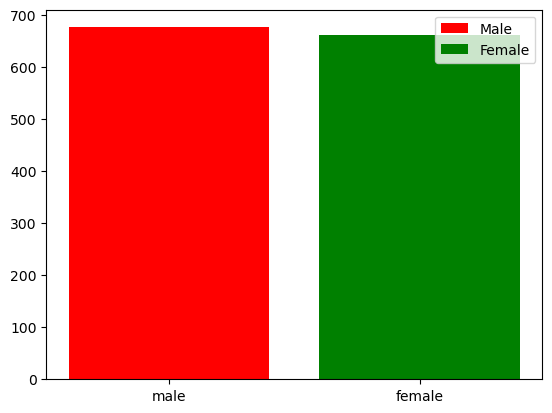

In [50]:
import matplotlib.pyplot as plt
plot_data = dict(insured['sex'].value_counts())
print(plot_data)
plt.bar(['male','female'],[plot_data['male'],plot_data['female']],color = ['r','g'],label = ['Male','Female'])
plt.legend()
plt.show()

{'no': 1064, 'yes': 274}


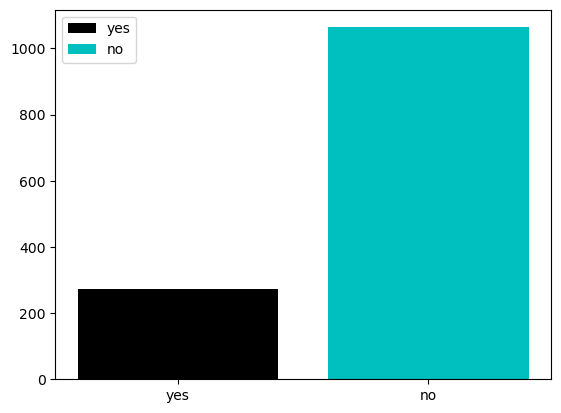

In [51]:
import matplotlib.pyplot as plt
plot_data = dict(insured['smoker'].value_counts())
print(plot_data)
plt.bar(['yes','no'],[plot_data['yes'],plot_data['no']],color = ['k','c'],label = ['yes','no'])
plt.legend()
plt.show()

{'southeast': 364, 'northwest': 325, 'southwest': 325, 'northeast': 324}


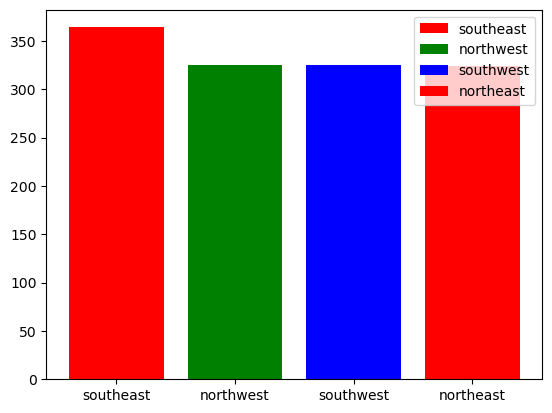

dict_keys(['southeast', 'northwest', 'southwest', 'northeast'])

In [52]:
plot_data = dict(insured['region'].value_counts())
print(plot_data)
plt.bar(plot_data.keys(),plot_data.values(),color = ['r','g','b'],label = plot_data.keys())
plt.legend()
plt.show()
plot_data
plot_data.keys()

{0: 574, 1: 324, 2: 240, 3: 157, 4: 25, 5: 18}


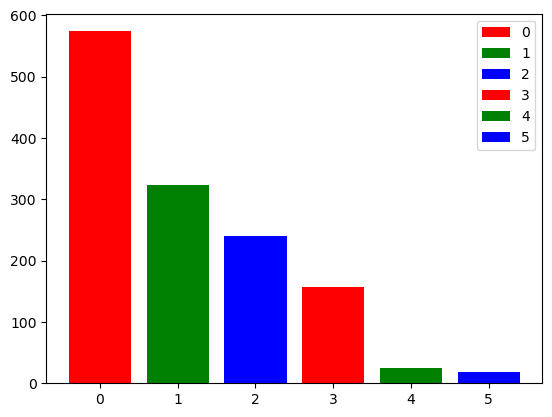

dict_keys([0, 1, 2, 3, 4, 5])

In [53]:
plot_data = dict(insured['children'].value_counts())
print(plot_data)
plt.bar(plot_data.keys(),plot_data.values(),color = ['r','g','b'],label = plot_data.keys())
plt.legend()
plt.show()
plot_data

plot_data.keys()

In [57]:
corr_insured = insured[['age','bmi','expenses','children']]

In [58]:
corr_insured.corr()

,age,bmi,expenses,children
age,1.000000,0.109341,0.299008,0.042469
bmi,0.109341,1.000000,0.198576,0.012645
expenses,0.299008,0.198576,1.000000,0.067998
children,0.042469,0.012645,0.067998,1.000000


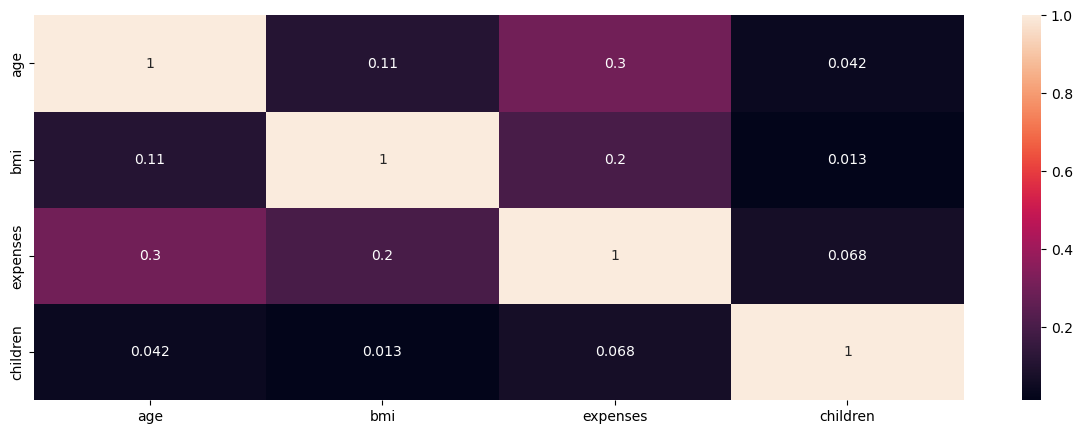

In [59]:
plt.figure(figsize=(15,5))
sns.heatmap(corr_insured.corr(),annot=True)
plt.show()

<Axes: xlabel='smoker', ylabel='count'>

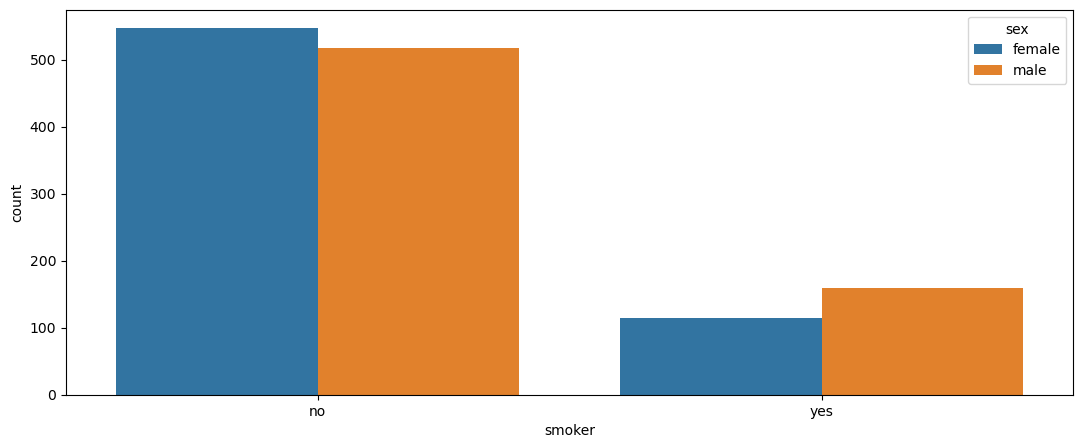

In [60]:
plt.figure(figsize=(13,5))
sns.countplot(x='smoker',hue='sex',data=insured)


<Axes: xlabel='children', ylabel='count'>

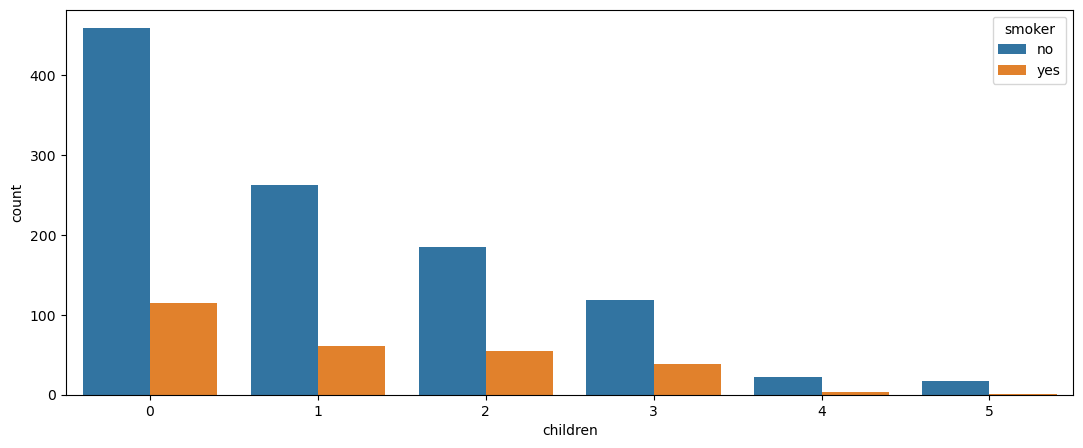

In [62]:
plt.figure(figsize=(13,5))
sns.countplot(x='children',hue='smoker',data=insured)

In [67]:
sns.relplot(x=insured['smoker'], y=insured['expenses'], hue=insured['gender'], size=  insured['children'],
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='expenses by smoker ,children and gender');

KeyError: 'gender'